In [2]:
!pip install pandas numpy scikit-learn matplotlib seaborn

In [3]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing


In [53]:
datset_path = r"D:\DolFIn\datasetTransactionAPI.csv"

In [19]:
datasetRF = pd.read_csv(datset_path)

In [21]:
# Display the first few rows of the dataset
datasetRF.head()

# Summary statistics
datasetRF.describe()

# Check for missing values
datasetRF.isnull().sum()


type                 0
id                   0
status               0
description          0
amount               0
account              0
balance              0
direction            0
class                0
institution          0
connection           0
enrich             289
transactionDate      0
postDate             0
subClass            53
links                0
dtype: int64

In [15]:
# Handling missing values (simple approach: drop or fill with mean)
datasetRF.dropna(inplace=True)  # OR datasetRF.fillna(datasetRF.mean(), inplace=True)

# Convert categorical columns (change 'subClass' if there are other columns)
datasetRF = pd.get_dummies(datasetRF, columns=['subClass'])

In [16]:
# Define predictors and target variable
X = datasetRF.drop('balance', axis=1)  # Assuming 'balance' is the target column
y = datasetRF['balance']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [17]:
print(datasetRF.columns)

Index(['type', 'id', 'status', 'description', 'amount', 'account', 'balance',
       'direction', 'class', 'institution', 'connection', 'enrich',
       'transactionDate', 'postDate', 'links'],
      dtype='object')


In [20]:
print(datasetRF.shape)


(289, 16)


In [22]:
print(datasetRF.head())
print(datasetRF.describe())
print(datasetRF.isnull().sum())


          type                                    id  status  \
0  transaction  4957bcf6-f18f-43d7-94df-71f44a0bcf32  posted   
1  transaction  0d6e11ab-e28e-4de0-a152-600cc44fb61c  posted   
2  transaction  323f6d42-a38e-4c46-83d2-6c8f3e999686  posted   
3  transaction  1ab3a3c5-faeb-4de3-b5aa-612e5bc76fd5  posted   
4  transaction  d12df6a2-48b6-4f5f-a718-ccb377aa330c  posted   

                                        description  amount  \
0  Wdl ATM WES IGA BALGOWLAH HGT  BALGOWL        AU  -200.0   
1                      Non Hooli ATM Withdrawal Fee    -2.5   
2  Wdl ATM WES IGA BALGOWLAH HGT  BALGOWL        AU  -200.0   
3                      Non Hooli ATM Withdrawal Fee    -2.5   
4                   Transfer Platnm Homeloan 346454 -3852.5   

                                account   balance direction            class  \
0                              d3de1ca1  22109.56     debit  cash-withdrawal   
1  070c1d68-0ee0-477a-9679-294ea7059939  22309.56     debit         bank-fee

In [23]:
# Fill numeric columns with the mean of the column
datasetRF['enrich'].fillna(datasetRF['enrich'].mean(), inplace=True)

In [24]:
datasetRF = pd.get_dummies(datasetRF)


In [25]:
X = datasetRF.drop('balance', axis=1)
y = datasetRF['balance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)


ValueError: Input X contains NaN.
RandomForestRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [27]:
print(datasetRF.isnull().sum())


amount                                                                                                                                       0
balance                                                                                                                                      0
enrich                                                                                                                                     289
type_transaction                                                                                                                             0
id_002dad4d-9c8c-4da0-921f-2bc1087f0b1f                                                                                                      0
                                                                                                                                          ... 
links_{\self\":\"https://au-api.basiq.io/users/bca4b9cc-b7e2-4458-83bc-4855c147bd70/transactions/ea93880b-31cc-4be3-ae4e-5f6d20efa543\"      0

In [28]:
print(datasetRF['enrich'].dtype)


float64


In [29]:
datasetRF['enrich'].fillna(datasetRF['enrich'].mean(), inplace=True)


In [30]:
print(datasetRF.isnull().sum())


amount                                                                                                                                       0
balance                                                                                                                                      0
enrich                                                                                                                                     289
type_transaction                                                                                                                             0
id_002dad4d-9c8c-4da0-921f-2bc1087f0b1f                                                                                                      0
                                                                                                                                          ... 
links_{\self\":\"https://au-api.basiq.io/users/bca4b9cc-b7e2-4458-83bc-4855c147bd70/transactions/ea93880b-31cc-4be3-ae4e-5f6d20efa543\"      0

In [32]:
# Filling missing values in 'enrich' with its mean
datasetRF['enrich'].fillna(datasetRF['enrich'].mean(), inplace=True)



In [33]:
# Verify if NaN values are addressed
print(datasetRF.isnull().sum())


amount                                                                                                                                       0
balance                                                                                                                                      0
enrich                                                                                                                                     289
type_transaction                                                                                                                             0
id_002dad4d-9c8c-4da0-921f-2bc1087f0b1f                                                                                                      0
                                                                                                                                          ... 
links_{\self\":\"https://au-api.basiq.io/users/bca4b9cc-b7e2-4458-83bc-4855c147bd70/transactions/ea93880b-31cc-4be3-ae4e-5f6d20efa543\"      0

In [34]:
datasetRF.dropna(subset=['enrich'], inplace=True)


In [35]:
# Verify if NaN values are addressed
print(datasetRF.isnull().sum())


amount                                                                                                                                     0.0
balance                                                                                                                                    0.0
enrich                                                                                                                                     0.0
type_transaction                                                                                                                           0.0
id_002dad4d-9c8c-4da0-921f-2bc1087f0b1f                                                                                                    0.0
                                                                                                                                          ... 
links_{\self\":\"https://au-api.basiq.io/users/bca4b9cc-b7e2-4458-83bc-4855c147bd70/transactions/ea93880b-31cc-4be3-ae4e-5f6d20efa543\"    0.0

In [36]:
from sklearn.model_selection import train_test_split

# We're predicting 'balance', so we set it as our target variable.
X = datasetRF.drop('balance', axis=1)
y = datasetRF['balance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [37]:
print(datasetRF.shape)


(0, 725)


In [38]:
datasetRF = pd.read_csv(datset_path)


In [39]:
print(datasetRF.head())
print(datasetRF.shape)


          type                                    id  status  \
0  transaction  4957bcf6-f18f-43d7-94df-71f44a0bcf32  posted   
1  transaction  0d6e11ab-e28e-4de0-a152-600cc44fb61c  posted   
2  transaction  323f6d42-a38e-4c46-83d2-6c8f3e999686  posted   
3  transaction  1ab3a3c5-faeb-4de3-b5aa-612e5bc76fd5  posted   
4  transaction  d12df6a2-48b6-4f5f-a718-ccb377aa330c  posted   

                                        description  amount  \
0  Wdl ATM WES IGA BALGOWLAH HGT  BALGOWL        AU  -200.0   
1                      Non Hooli ATM Withdrawal Fee    -2.5   
2  Wdl ATM WES IGA BALGOWLAH HGT  BALGOWL        AU  -200.0   
3                      Non Hooli ATM Withdrawal Fee    -2.5   
4                   Transfer Platnm Homeloan 346454 -3852.5   

                                account   balance direction            class  \
0                              d3de1ca1  22109.56     debit  cash-withdrawal   
1  070c1d68-0ee0-477a-9679-294ea7059939  22309.56     debit         bank-fee

In [40]:
datasetRF.drop(['enrich'], axis=1, inplace=True)
datasetRF = pd.get_dummies(datasetRF, columns=['type'], prefix=['type'])
print(datasetRF.shape)


(289, 15)


In [41]:
from sklearn.model_selection import train_test_split

# Defining X and Y
X = datasetRF.drop('balance', axis=1)
y = datasetRF['balance']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)


(231, 14) (58, 14)


In [42]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predict on test data
y_pred = rf.predict(X_test)


ValueError: could not convert string to float: '5a85f687-741e-4b44-8cb8-9b5a2039f04c'

In [43]:
column_with_string = datasetRF.columns[datasetRF.isin(['5a85f687-741e-4b44-8cb8-9b5a2039f04c']).any()].tolist()
print(column_with_string)


['id']


In [44]:
# Dropping the 'id' column
datasetRF.drop(['id'], axis=1, inplace=True)

In [45]:
# Splitting the data
from sklearn.model_selection import train_test_split

X = datasetRF.drop('balance', axis=1)
y = datasetRF['balance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Running Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)


ValueError: could not convert string to float: 'posted'

In [46]:
# Check which columns have non-numeric values
non_numeric_cols = datasetRF.select_dtypes(exclude=['number']).columns
print(non_numeric_cols)


Index(['status', 'description', 'account', 'direction', 'class', 'institution',
       'connection', 'transactionDate', 'postDate', 'subClass', 'links'],
      dtype='object')


In [47]:
columns_to_drop = ['status', 'description', 'account', 'direction', 'class', 'institution',
                   'connection', 'transactionDate', 'postDate', 'subClass', 'links']
datasetRF.drop(columns=columns_to_drop, inplace=True)

In [48]:
print(datasetRF.shape)

(289, 3)


In [49]:
datasetRF.head()


,amount,balance,type_transaction
0,-200.0,22109.56,1
1,-2.5,22309.56,1
2,-200.0,22312.06,1
3,-2.5,22512.06,1
4,-3852.5,22514.56,1


In [50]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [56]:
# Load the data
def getSampleData():
    return pd.read_csv(datset_path)

raw = getSampleData()

In [57]:
# Drop unwanted columns
clean = raw.copy(deep=True)
clean.drop(['type', 'id', 'status', 'direction', 'connection', 'subClass', 'links', 'description', 'postDate', 'enrich', 'institution', 'account'], axis=1, inplace=True)

In [58]:
datesAsTimestamp = pd.to_datetime(clean.pop('transactionDate'), format='%d/%m/%Y')
datesAsTimestamp = datesAsTimestamp.map(pd.Timestamp.timestamp)

day = 24*60*60
year = (365.2425)*day

clean['Day sin'] = np.sin(datesAsTimestamp * (2 * np.pi / day))
clean['Day cos'] = np.cos(datesAsTimestamp * (2 * np.pi / day))
clean['Year sin'] = np.sin(datesAsTimestamp * (2 * np.pi / year))
clean['Year cos'] = np.cos(datesAsTimestamp * (2 * np.pi / year))


In [59]:
encodedClasses = pd.get_dummies(clean.pop('class'))
clean = clean.join(encodedClasses)


In [60]:
trainPercent = 0.75
validationPercent = 0.15

n = len(clean)
train_df = clean[0:int(n*trainPercent)]
val_df = clean[int(n*trainPercent):int(n*(1-validationPercent))]


In [61]:
scaler = StandardScaler()
train_df = pd.DataFrame(scaler.fit_transform(train_df), columns=train_df.columns)
val_df = pd.DataFrame(scaler.transform(val_df), columns=val_df.columns)


In [63]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Prepare data
X_train = train_df.drop('amount', axis=1)
y_train = train_df['amount']

X_val = val_df.drop('amount', axis=1)
y_val = val_df['amount']

# Train Random Forest for Regression
rf_regressor = RandomForestRegressor(n_estimators=100)
rf_regressor.fit(X_train, y_train)

# Predict
y_pred = rf_regressor.predict(X_val)

# Calculate Mean Squared Error (A common metric for regression tasks)
mse = mean_squared_error(y_val, y_pred)
print(f"Mean Squared Error: {mse:.2f}")


Mean Squared Error: 0.04


In [64]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_val, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")


Mean Absolute Error: 0.12


In [65]:
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse:.2f}")


Root Mean Squared Error: 0.20


In [66]:
from sklearn.metrics import r2_score
r2 = r2_score(y_val, y_pred)
print(f"R-squared: {r2:.2f}")


R-squared: 0.96


In [67]:
mape = np.mean(np.abs((y_val - y_pred) / y_val)) * 100
print(f"Mean Absolute Percentage Error: {mape:.2f}%")


Mean Absolute Percentage Error: 128.03%


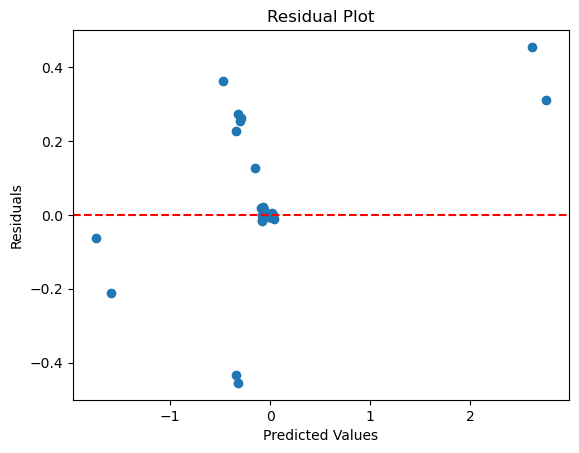

In [68]:
import matplotlib.pyplot as plt
residuals = y_val - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()
